In [1]:
data = """SOIL1	   [1] Dry bulk density (BD)
SOIL2	   [2] Water retention (pF curve)
SOIL3	   [3] Infiltration rate
SOIL4	   [4] Soil moisture (via bulk density samples)
SOIL5	   [5] Soil moisture (Decagon moisture sensor) 
SOIL6	   [6] Soil texture 
SOIL7	   [7] Aggregate stability
SOIL8	   [8] Penetration resistance
SOIL9	   [9] Soil description to soil profile or rooting zone depth
SOIL10	   [10] Earthworm (EW) activity
SOIL11	   [11] pH 
SOIL12	   [12] Cation Exchange Capacity (CEC) 
SOIL13	   [13] Soil Organic Carbon (SOC)
SOIL14	   [14] Total N 
SOIL15	[15] Soil Nitrate Spring Sampling
SOIL16	[16] Soil Nitrate Summer Sampling
SOIL23	[23] Soil Nitrate Fall Sampling
SOIL17	   [17] Fractionation of soil organic matter 
SOIL18	   [18] Particulate organic matter (POM)
SOIL19	   [19] Standard soil fertility routine analysis 
SOIL20	   [20] Salinity
SOIL22	[22] Spring Soil Ammonium (Optional)
SOIL24	[24] Summer Soil Ammonium (Optional)
SOIL25	[25] Fall Soil Ammonium (Optional)"""
varlookup = {}
for line in data.split("\n"):
    tokens = line.split()
    varlookup[ tokens[0] ] = " ".join(tokens[1:])

In [2]:
import psycopg2
import pandas as pd
import numpy as np
pgconn = psycopg2.connect(database='sustainablecorn', host='iemdb', user='nobody')
cursor = pgconn.cursor()
pd.set_printoptions(max_rows=400, max_columns=10)
cursor.execute("""
 SELECT site, a.plotid, depth, varname, value, year, p.rotation, p.tillage from soil_nitrate_data a JOIN plotids p
 on (p.uniqueid = a.site and p.plotid = a.plotid)
 WHERE value ~* '[0-9\.]' and value != '.' and value !~* '<'
""")
rows = []
for row in cursor:
    rows.append( dict(siteid=row[0], plotid=row[1], depth=row[2], varname=row[3], val=float(row[4]),
                      year=row[5], rotation=row[6], tillage=row[7]) )
    
df = pd.DataFrame(rows)
print 'Loaded %s rows from the database!' % (len(df),)

Loaded 2249 rows from the database!


/usr/lib64/python2.6/site-packages/pandas/core/format.py:1653: FutureWarning: set_printoptions is deprecated, use set_option instead
  FutureWarning)


In [3]:
df.varname.unique()
def myconv(v):
    if v['rotation'] in ['ROT36'] and v['year'] in [2011,2013,2015]:
        return 'CC Before Corn'
    if v['rotation'] in ['ROT4'] and v['year'] in [2011,2013,2015]:
        return 'Before Corn'
    if v['rotation'] in ['ROT37'] and v['year'] in [2012,2014]:
        return 'CC Before Corn'
    if v['rotation'] in ['ROT5'] and v['year'] in [2012,2014]:
        return 'Before Corn'
    if v['rotation'] in ['ROT4'] and v['year'] in [2012,2014]:
        return 'Before Soy'
    if v['rotation'] in ['ROT36'] and v['year'] in [2012,2014]:
        return 'CC Before Soy'
    if v['rotation'] in ['ROT37'] and v['year'] in [2011,2013,2015]:
        return 'CC Before Soy'
    if v['rotation'] in ['ROT5'] and v['year'] in [2011,2013,2015]:
        return 'Before Soy'
    
df['label'] = df.apply(myconv, raw=True, axis=1)

In [33]:
v="SOIL15"
print "Showing %s %s" % (v, varlookup[v])
df[df.varname==v].pivot_table(rows=['siteid','depth'], cols=['year'], aggfunc=np.mean)

Showing SOIL15 [15] Soil Nitrate Spring Sampling


val                     
year                     2011      2012       2013
siteid      depth                                 
DPAC        0 - 30        NaN  3.750000        NaN
            30 - 60       NaN  2.500000        NaN
FREEMAN     0 - 30        NaN       NaN   1.227660
            30 - 60       NaN       NaN   1.033333
GILMORE     0 - 30   3.729167  9.104167        NaN
            30 - 60  4.787500  5.883333        NaN
ISUAG       0 - 30   2.062500  2.250000   1.731250
            30 - 60  1.856250  1.812500   2.037500
SEPAC       0 - 30        NaN  1.437500   1.187500
            30 - 60       NaN  2.500000   2.687500
WOOSTER.COV 0 - 30        NaN       NaN  26.212500
            30 - 60       NaN       NaN   7.687500

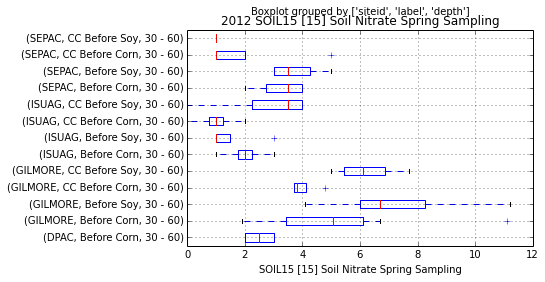

In [4]:
v = "SOIL15"
ax = df[(df.varname==v)&(df.depth=='30 - 60')&(df.year==2012)&
        ((df.rotation=='ROT4')|(df.rotation=='ROT5')|(df.rotation=='ROT37')|(df.rotation=='ROT36'))
        ].boxplot(column='val', by=['siteid','label','depth'], vert=False)
ax.set_title("2012 %s %s" % (v, varlookup[v]))
ax.set_xlabel("%s %s" % (v, varlookup[v]))

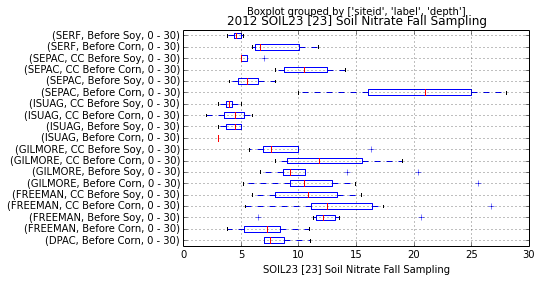

In [5]:
v = "SOIL23"
ax = df[(df.varname==v)&(df.depth=='0 - 30')&(df.year==2012)&
        ((df.rotation=='ROT4')|(df.rotation=='ROT5')|(df.rotation=='ROT37')|(df.rotation=='ROT36'))
        ].boxplot(column='val', by=['siteid','label','depth'], vert=False)
ax.set_title("2012 %s %s" % (v, varlookup[v]))
ax.set_xlabel("%s %s" % (v, varlookup[v]))

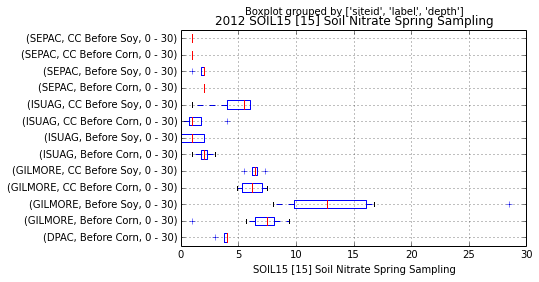

In [59]:
v = "SOIL15"
ax = df[(df.varname==v)&(df.depth=='0 - 30')&(df.year==2012)&
        ((df.rotation=='ROT4')|(df.rotation=='ROT5')|(df.rotation=='ROT37')|(df.rotation=='ROT36'))
        ].boxplot(column='val', by=['siteid','label','depth'], vert=False)
ax.set_title("2012 %s %s" % (v, varlookup[v]))
ax.set_xlabel("%s %s" % (v, varlookup[v]))


(0, 10)

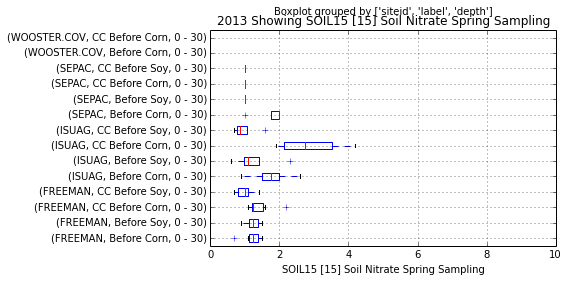

In [58]:
v = "SOIL15"
ax = df[(df.varname==v)&(df.depth=='0 - 30')&(df.year==2013)&
        ((df.rotation=='ROT4')|(df.rotation=='ROT5')|(df.rotation=='ROT37')|(df.rotation=='ROT36'))
        ].boxplot(column='val', by=['siteid','label','depth'], vert=False)
ax.set_title("2013 Showing %s %s" % (v, varlookup[v]))
ax.set_xlabel("%s %s" % (v, varlookup[v]))
ax.set_xlim(0,10)


ValueError: need more than 0 values to unpack

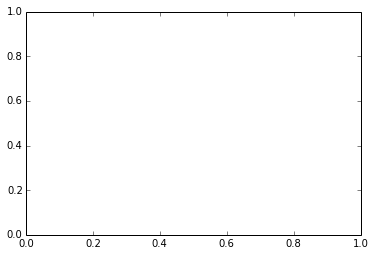

In [63]:
v = "SOIL33"
ax = df[(df.varname==v)&(df.depth=='0 - 30')&(df.siteid!='WOOSTER.COV')&
        ((df.rotation=='ROT4')|(df.rotation=='ROT5')|(df.rotation=='ROT37')|(df.rotation=='ROT36'))
        ].boxplot(column='val', by=['rotation', 'year'], vert=False)
ax.set_title("Showing %s %s" % (v, varlookup[v]))
ax.set_xlabel("%s %s" % (v, varlookup[v]))
#ax.set_xlim(0,10)